# Importing libraries

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

# Defining data

In [9]:
y = [79.31, 57.43, 60.66, 92.55, 90.12, 71.30, 70.50, 91.62, 68.31]
x = [5.84, 3.82, 5.19, 9.22, 7.87, 6.29, 4.33, 8.91, 5.34]

In [10]:
x_2 = np.array([1, 0.5, 87, 12, 5])
y_2 = np.sqrt(x_2)

In [11]:
assert len(y)==len(x)

# Liner regression

In [19]:
class LinearRegression:
    def __init__(self, polynomial=False):
        self.polynomial = polynomial
        self.W = None
        self.b = None
        self.c = None
        
    def objective(self, y_true, y_pred):
        return sum([(y_pred[i]-y_true[i])**2 for i in range(len(y_true))])
    
    def __mean(self, vector):
        return sum(vector)/len(vector)    
    
    def fit(self, X, y, verbose=0):
        M_x = self.__mean(X)
        M_x_2 = self.__mean(list(map(lambda x: x**2, X)))
        M_y = self.__mean(y)
        M_x_y = self.__mean([X[i]*y[i] for i in range(len(X))])
        
        if self.polynomial:
            M_x_4 = self.__mean(list(map(lambda x: x**4, X)))
            M_x_3 = self.__mean(list(map(lambda x: x**3, X)))
            M_x_2_y = self.__mean([(X[i]**2)*y[i] for i in range(len(X))])
            
            A = [[M_x_4, M_x_3, M_x_2], [M_x_3, M_x_2, M_x], [M_x_2, M_x, 1]]
            b = [M_x_2_y, M_x_y, M_y]
            
            self.W, self.b, self.c = np.linalg.solve(np.array(A),b)

        else:
            A = [[M_x_2, M_x], [M_x, 1]]
            b = [M_x_y, M_y]
            self.W, self.b = np.linalg.solve(np.array(A),b)
        
        if verbose:
            print('Sum of squared errors : {}'.format(self.objective(y, self.predict(X))))
        
    
    
    def predict(self, X):
        if not self.polynomial:
            assert self.W and self.b, "Before predicting, you should fit the model using fit method!"
            return [self.W*i+self.b for i in X]
        else:
            assert self.W and self.b and self.c, "Before predicting, you should fit the model using fit method!"
            return [self.W*(i**2)+self.b*i+self.c for i in X] 

# Experiments

## Experiment with function from lab

In [20]:
lr = LinearRegression()

In [21]:
lr.fit(x,y, 1)

Sum of squared errors : 209.86549180525483


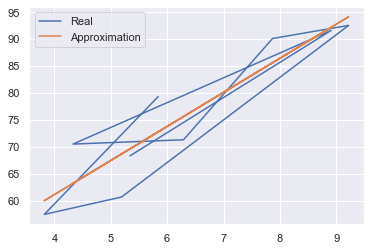

In [22]:
plt.plot(x,y)
plt.plot(x,lr.predict(x))
plt.legend(['Real','Approximation'])

In [23]:
lr = LinearRegression(polynomial=True)

In [24]:
lr.fit(x,y, 1)

Sum of squared errors : 209.66575311530931


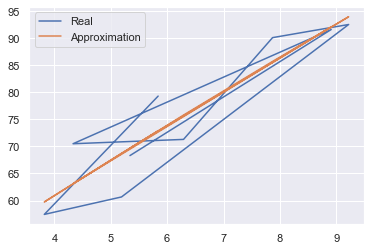

In [25]:
plt.plot(x,y)
plt.plot(x,lr.predict(x))
plt.legend(['Real','Approximation'])

## Experiment with other function

In [26]:
lr = LinearRegression()

In [27]:
lr.fit(x_2,y_2, 1)

Sum of squared errors : 1.851919469425051


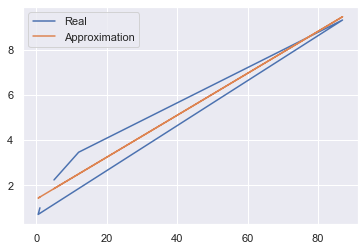

In [28]:
plt.plot(x_2,y_2)
plt.plot(x_2,lr.predict(x_2))
plt.legend(['Real','Approximation'])

In [29]:
lr = LinearRegression(polynomial=True)

In [30]:
lr.fit(x_2,y_2, 1)

Sum of squared errors : 0.10114356063937446


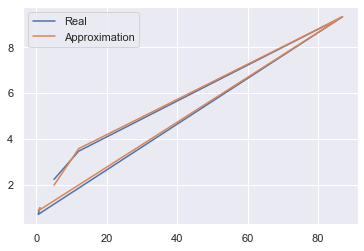

In [31]:
plt.plot(x_2,y_2)
plt.plot(x_2,lr.predict(x_2))
plt.legend(['Real','Approximation'])